# HW 05 
# Gary Fowler


## Exercise 6.1 

### Circuit of resistors


Considering a given circuit of resistors. All resistors have the same resistance R. The power rail at the top is at voltage V = 5V. What are the other 4 voltages?

Write equations for each junction of the unkown voltages.
Write a program to solve the four resulting equations using Gaussian elimination and find the four voltages.

In [2]:
## @author: Gary Fowler

"""
@A: the matrix holding our 4 equations and 4 unknowns
@v: the solution vector (our total voltages at each point)
@N: used for our for loop, holds vector size

in this program we will calculate four voltages given equal resistances

"""
import numpy as np

"""
the 4 equations
4v1 - v2 - v3 - v4 = 5
-v1 + 3v2 + 0v3 - v4 = 0
-v1 + 0v2 + 3v3 - v4 = 5
-v1 - v2 - v3 + 4v4 = 0
this creates a matrix
"""
A = np.array([[4,-1,-1,-1],
            [-1,3,0,-1],
            [-1,0,3,-1],
            [-1,-1,-1,4]],float)
v = np.array([5,0,5,0],float)
N = len(v)

# the Gauss Elim
for m in range(N):
    #divide the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div
    
    #subtract from lower rows
    for i in range(m+1,N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]
        
#backsubstitution
x = np.empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]
        
print("The four voltages are: \nv1 =",x[0],"\nv2 =",x[1],"\nv3 =",x[2],"\nv4 =",x[3])


The four voltages are: 
v1 = 3.0 
v2 = 1.66666666667 
v3 = 3.33333333333 
v4 = 2.0


## Exercise 6.4 

### Testing numpy.linalg


Write a program to solve the resistor network problem of exercise 6.1 using numpy.linalg

In [3]:
## @author: Gary Fowler

"""
@A: the matrix holding our 4 equations and 4 unknowns
@v: the solution vector (our total voltages at each point)
@N: used for our for loop, holds vector size

in this program we will calculate four voltages given equal resistances, in this one we will be using np.linalg.solve

"""
import numpy as np

"""
the 4 equations
4v1 - v2 - v3 - v4 = 5
-v1 + 3v2 + 0v3 - v4 = 0
-v1 + 0v2 + 3v3 - v4 = 5
-v1 - v2 - v3 + 4v4 = 0
this creates a matrix
"""
A = np.array([[4,-1,-1,-1],
            [-1,3,0,-1],
            [-1,0,3,-1],
            [-1,-1,-1,4]],float)
v = np.array([5,0,5,0],float)

x = np.linalg.solve(A,v)
        
print("The four voltages are: \nv1 =",x[0],"\nv2 =",x[1],"\nv3 =",x[2],"\nv4 =",x[3])
print("\nThe voltages are equivalent to the solution derived using Gaussian Elimination")

The four voltages are: 
v1 = 3.0 
v2 = 1.66666666667 
v3 = 3.33333333333 
v4 = 2.0

The voltages are equivalent to the solution derived using Gaussian Elimination


## Exercise 6.10 

### Testing numpy.linalg


Consider the equation x = 1 - e^-cx, where c is known and x is unknown.
Write a program to solve this equation for x using the relaxation method for the case c = 2. Calculate your solution to an accuracy of 1e^-6
Modify the program to calculate the solution for values of c from 0 to 3 in steps of .01 and make a plot of x as a function of c

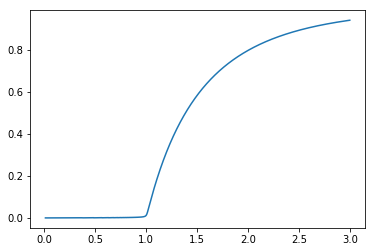

In [21]:
## @author: Gary Fowler

"""
@accuracy: this is how accuract we want our solution to be
@cmax: the maximum c value that we are solving x for
@points: how many times we will loop
@y: an array to hold all of our solution points at the given c value
@carray: this holds all of our cvalues
@error: the error value that manages our while loop

in this program we will converge the equation 1-e^-cx where c = 2

"""
import numpy as np
import matplotlib.pyplot as plt

#constants
accuracy = 1e-6
cmax = 3.0
points = 10000

y = []
carray = np.linspace(0.01,cmax,points)

for c in carray:
    x1 = 1.0
    error = 1.0

    while error>accuracy:
        x1,x2 = 1-np.exp(-c*x1),x1
        error = abs((x1-x2)/(1-(1/(1-np.exp(-c*x2)))))
    y.append(x1)

plt.plot(carray,y)
plt.show()

## Exercise 6.12 

### Glycolysis solutions


The process of glycolysis can be modeled by equations:
dx/dt = -x + ay + x^2 * y
dy/dt = b - ay - x^2 * y
x and y represent concentrations of two chemicals, ADP and F6P, and a and b are positive constants.

Write a program to solve the solutions to these equations for the stationary point using the relaxation method with a = 1 and b = 2. The method should fail to converge.
Find a new way to rearrange the equations such that when applying the relaxation method the equation converges and gives a solution.

The equation solutions mentioned are:
x = y(a+x^2) and y = b/(a+x^2)

In [4]:
## @author: Gary Fowler

"""
@a,b: constants in the equation
@x,y: the equations running through the relaxation method

in this program we are given two equations that will not converge, we will prove their failure to converge and then rearrange
them so that they will then converge

the solution to these are:
x = b
y = b / (a+x**2)

"""
import numpy as np

#constants
a = 1.0
b = 2.0

"""
#equations
x = y(a+x**2)
y = b / (a + x**2)
"""
x = 1.0
y = 1.0
for k in range(10):
    x = y*(a+x**2)
    y = b / (a+x**2)
    print(x,y)
    
#part 2 of the problem
"""
here we will find the inverse of the x = equation
x = y / (a+y**2)
we do this because it is often that the inverse of the equation will converge to the solution if the original does not
"""
print("\n")
x = 1.0
y = 1.0
for k in range(10):
    x = y / (a+y**2)
    y = b / (a+x**2)
    print(x,y)


2.0 0.4
2.0 0.4
2.0 0.4
2.0 0.4
2.0 0.4
2.0 0.4
2.0 0.4
2.0 0.4
2.0 0.4
2.0 0.4


0.5 1.6
0.449438202247191 1.6639008507509716
0.44152094791262786 1.6737231567968947
0.44029713301057416 1.675236106151797
0.4401085170812979 1.6754691532256303
0.44007946122415675 1.6755050504861022
0.440074985566762 1.675510579894173
0.44007429616083227 1.675511431612373
0.4400741899686783 1.675511562806141
0.44007417361144946 1.6755115830144736


## Exercise 6.13ab

### Wien's displacement constant

a)
5e-x + x - 5 = 0
b) Write a progarm to solve this equation to an accuracy of epsilon = 1e-6 using the binary search method.

In [18]:
## @author: Gary Fowler

"""
in this program we will be using the binary search method to find a solution to the equation:
5e-x + x - 5 = 0
and then determine wiens constant with this solution
"""
import numpy as np

#constants
kb = 1.38e-23 #Boltzmanns constants
c = 3.0e8     #speed of light
h = 6.626e-34 #Plancks constant

def f(x):
    return 5*np.exp(-x) + x - 5

accuracy = 1e-6
#given x1,x2 make sure that f(x1) and f(x2) have opposing signs.
x1,x2 = .1,-.1

if f(x1) * f(x2) > 0:
    print("bisection is not possible, the signs are the same")
else:
    error = 1.0
    while(error>accuracy):
        xprime = (x1 + x2) * 0.5
        if f(x1) * f(xprime) > 0:
            x1 = xprime
        else:
            x2 = xprime
        error = abs(x1-x2)
    solution = (x1+x2) * 0.5
    print("The solution to the equation is",solution)
    print("Thus we find Wien's constant to be:",(h*c)/(kb*solution))
    


The solution to the equation is 3.814697265625e-07
Thus we find Wien's constant to be: 37760.13356521739


## Exercise 6.15

### Roots of a polynomial

Consider the polynomial:
P(x) = 924x^6 - 2772x^5 + 3150x^4 - 1680x^3 + 420x^2 - 42x + 1

Make a plot of the polynomial
Then solve the six roots to an accuracy of 1e-10 using Newton's method

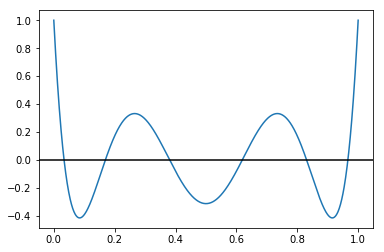

OverflowError: (34, 'Result too large')

In [31]:
## @author: Gary Fowler

"""
@accuracy: this is how accuract we want our solution to be
@cmax: the maximum c value that we are solving x for
@points: how many times we will loop
@y: an array to hold all of our solution points at the given c value
@carray: this holds all of our cvalues
@error: the error value that manages our while loop

in this program we will converge the equation 1-e^-cx where c = 2

"""
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

def df(x):
    return 5544*x**5 - 13860*x**4 + 12600*x**3 - 5040*x**2 + 840*x - 42

#constants
accuracy = 1e-10
points = 1000

y = []
xpoints = np.linspace(0,1,points)

for i in xpoints:
    y1 = f(i)
    y.append(y1)

fig, ax = plt.subplots()      
ax.plot(xpoints,y)
ax.axhline(y=0, color='k')
plt.show()


x = 0.0
delta = 1.0
while abs(delta)>accuracy:
    delta = df(x)
    x -= error

print(x)